Numerical Integration and Differentiation
====

## Unit 9, Lecture 3

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, March 28, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Numerical Differentiation
====

Given a set of points $x$ and $f(x)$, how do I compute $f'(x)$?

The best you can do is compute an estimate for $f'(x)$ at each of the points. Recall the definition of a derivative:

$$f'(x) = \lim_{h\rightarrow 0} \frac{f(x + h) - f(x)}{h}$$

An easy way to estimate at a particular point, say the 4th data point, $f'(x_4)$ is to use:

$$f'(x_4) \approx \frac{f(x_5) - f(x_4)}{x_5 - x_4}$$

[Show secant picture]

The Forward Numerical Derivative
====

$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}$$

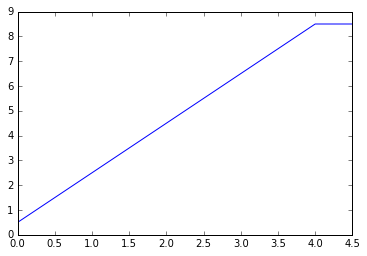

In [2]:
x = np.arange(0,5,0.5) #Create some points
y = x ** 2 #Create the square of those points, now we have f(x_i)
derivative = [] #This is where I will store the answer

#Since this if the forward derivative, we can only go up to the second to last point
for i in range(len(x) - 1): 
    dx = x[i + 1] - x[i]
    dy = y[i + 1] - y[i]
    derivative.append(dy / dx)
    
#We have to "repair" our problem of skipping the last point
#We just repeat the last element
derivative.append(derivative[-1])
    
plt.plot(x,derivative)
plt.show()

Forward Rule in 1 line with Numpy
====

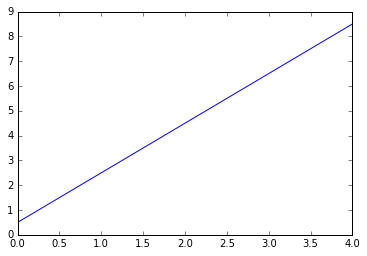

In [3]:
#Using numpy
#Note x[1:] is all but the first element
#x[:-1] is all but the last element
#So x[1:] - x[:-1] is an idiom for x[1] - x[0], x[2] - x[1], x[3] - x[2], .....
derivative = (y[1:] - y[:-1]) / (x[1:] - x[:-1])

 #Here I just skip the last point instead of adding it to the derivative
plt.plot(x[:-1], derivative)
plt.show()

Central Difference Rule
====

Obviously going only forward seems unintuitive. That leads to the central difference rule. You approximate the derivative with the average of the forward and backward approximations. Be careful with the indexes!

$$f'(x_i) = \frac{1}{2}\left[\frac{f(x_{i+1})- f(x_i)}{x_{i + 1} - x_{i}} + \frac{f(x_{i})- f(x_{i-1})}{x_{i} - x_{i-1}}\right]$$

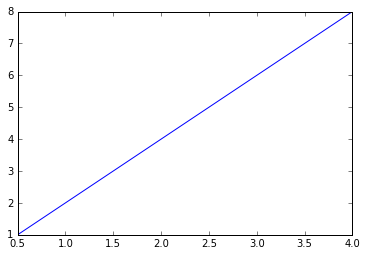

In [4]:
forward = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
backward = forward #They're the same numbers, but in forwards we start at 0 go to N-1 and
                   #in backwards we start at 1 and go to N
central = 0.5 * (forward[:-1] + backward[1:])# Combine the two 

plt.plot(x[1:-1], central)
plt.show()

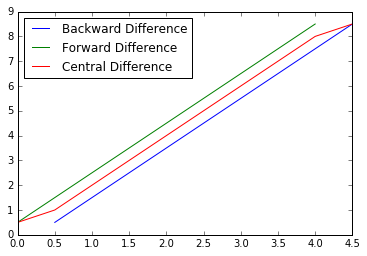

In [5]:
#To fill in, we can use the backward and forward respectively
#We have to declare it ahead of time, because we can't create it all at once. Only in pieces
central = np.zeros(len(x)) 

#this code is the same as above
forward = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
backward = forward #All that's different is which x-value the points are attached to.

central[0] = forward[0] #Forwards exists at the left point
central[-1] = backward[-1] #Backwards exists at the right point

central[1:-1] = 0.5 * (forward[:-1] + backward[1:]) #Set the rest of the points

plt.plot(x[1:], backward, label="Backward Difference")
plt.plot(x[:-1], forward, label="Forward Difference")
plt.plot(x, central, label="Central Difference")
plt.legend(loc="upper left")
plt.show()

Numerical Integration
====

One strategy is the Riemann integration strategy, which looks like:

$$\int f(x)\,dx \approx \sum^N f(x_i) \Delta x$$

[draw picture]

We can do better than that. [Draw Picture]. The trapezoidal rule allows us to better approximate integrals. It's definition is (for non-uniform grid):

$$\int_a^b f(x)\,dx \approx \frac{1}{2} \sum_{i=1}^N (x_{i + 1} - x_i)(f(x_{i + 1}) + f(x_i))$$



In [6]:
from math import pi

x = np.linspace(0,pi,10)
y = np.sin(x)

little_traps = 0.5 * (x[1:] - x[:-1]) * (y[1:] + y[:-1])
trap = np.sum(little_traps)
print(trap)

1.97965081122


Comparison of Riemann vs Trapezoidal
====

In [7]:
def trap(x,y):
    return 0.5 * np.sum( (x[1:] - x[:-1]) * (y[1:] + y[:-1]) )

def rie(x,y):
    return np.sum(y[:-1] * (x[1:] - x[:-1]) )


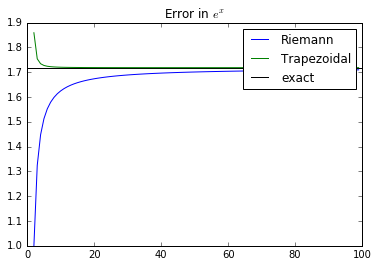

In [8]:
rie_error = []
trap_error = []
points = range(2, 100,1)
for i in points:
    x = np.linspace(0,1,i)
    y = np.exp(x)
    rie_error.append(rie(x,y))
    trap_error.append(trap(x,y))
    
plt.hlines(np.exp(1) - 1, 0,100, label="exact")
plt.plot(points, rie_error, label="Riemann")
plt.plot(points, trap_error, label="Trapezoidal")
plt.xlim(0,100)
plt.legend()
plt.title("Error in $e^x$")
plt.show()

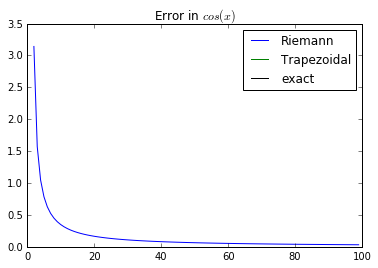

In [9]:
rie_error = []
trap_error = []
points = range(2, 100,1)
for i in points:
    x = np.linspace(0,pi,i)
    y = np.cos(x)
    rie_error.append(rie(x,y))
    trap_error.append(trap(x,y))
    
plt.hlines(np.sin(pi), 0,100, label="exact")
plt.plot(points, rie_error, label="Riemann")
plt.plot(points, trap_error, label="Trapezoidal")
plt.xlim(0,100)
plt.legend()
plt.title("Error in $cos(x)$")
plt.show()

Passing Functions around
====

You can pass functions to functions. Example:

In [10]:
def execute(f):
    print(f(5)) #<--- I just assume f is a function!
    
execute(np.cos)

0.283662185463


In [11]:
execute(5)

TypeError: 'int' object is not callable

Why the heck would you want to do this?!
----

Create a function that:

1. Plots the given function
2. Evaluates an integral on a function
3. Samples from the given function
4. Calls the function and histograms its output

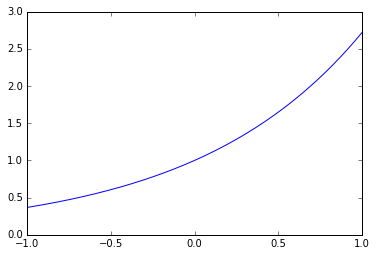

In [12]:
def plot_function(fxn, xlo, xhi):
    x = np.linspace(xlo, xhi, 1000)
    plt.plot(x, fxn(x))
    plt.show()
    
plot_function(np.exp, -1, 1)

In [13]:
def trap_integrate(fxn, a, b, points=1000):
    x = np.linspace(a,b,points)
    y = fxn(x) # <----- Just execute function. Note this only works if fxn is a numpy function!!!
    return 0.5 * np.sum( (x[1:] - x[:-1]) * (y[1:] + y[:-1]) )

print(trap_integrate(np.exp, 0,1))
print(np.exp(1) - 1)

1.71828197194
1.71828182846


Integrating Functions
====

Lots of people know about this hidden feature and some great integration functions exist. Such as the adaptive Gaussian-quadrature called `scipy.integrate.quad`. This works for functions which can be evaluated anywhere

**If you are working with a function (not data) you use scipy.integrate.quad**

**If you are working with data (not a function) you use your own trapezoidal code**

In [14]:
def my_special_function(x):
    return x ** 2

from scipy.integrate import quad
#THE FUNCTION MUST BE A NUMPY COMPATIBLE FUNCTION
#So, use vectorize or if it only uses numpy functions (+,-,*,**,np.sin,np.cos...) you're OK
#If statements ARE NOT NUMPY FUNCTIONS
ans, error = quad(my_special_function,0,2) #<-- Notice that this is just like the np.histogram function, which gives two values
print('The answer is {} with an estimated error of {}'.format(ans,error))

The answer is 2.666666666666667 with an estimated error of 2.960594732333751e-14


In [15]:
def my_special_function(x):
    return np.exp(-x**2)

ans,err = quad(my_special_function, 0, np.inf)
print(ans, err)

0.8862269254527579 7.101318390472462e-09


Let's try a more challlenging integral
----

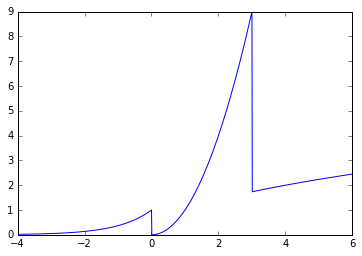

In [16]:
def confusing_function(x):
    if x < 0:
        return np.exp(x)
    if x < 3:
        return x**2
    if x == 3:
        return 0
    if x > 3:
        return np.sqrt(x)
    if x >= 5:
        return np.exp(-x)
    
#It converts my regular function into a numpy function
np_confusing_function = np.vectorize(confusing_function)
x = np.arange(-4,6,0.01)

plt.plot(x, np_confusing_function(x))
plt.show()

In [17]:
ans,err = quad(np_confusing_function, -4, 6) #Integrate it from -4 to 6 using the numpy version
print(ans,err)

16.315541717155426 5.6158704353492794e-09


Giving Hints to Quad
----

You can tell quad where it will run into problems, such as dicontinuities.

In [18]:
ans,err = quad(np_confusing_function, -4, 6, points=[0,3,5])
print(ans,err)

16.31554171710623 1.8113890073563594e-13


Lambda Functions
====

Sometimes it's tedious to define a function just to integrate. For short, you can use the special `lambda` word:

In [19]:
my_special_function = lambda x: x**2
print(my_special_function(5))

25


In [20]:
ans, error = quad(lambda x: np.sin(x), 0, 2)
print('The answer is {} with an estimated error of {}'.format(ans,error))

The answer is 1.4161468365471424 with an estimated error of 1.5722388241847156e-14


Plotting Integrals
====

To plot an integral, you can loop over multiple integrations

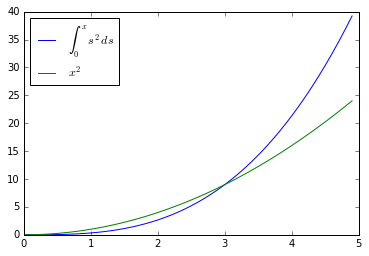

In [21]:
x = np.arange(0,5,0.1)
y = []
for xi in x:
    ans,err = quad(lambda x: x ** 2, 0, xi)
    y.append(ans)
    
plt.plot(x,y, label='$\int_0^x\, s^2\,ds$')
plt.plot(x, x**2, label='$x^2$')
plt.legend(loc='upper left')
plt.show()

Summary of Integration and Differentiation
====

**If you are integrating a function (not data) you use scipy.integrate.quad**

**If you are integrating data you use write your trapezoidal code**

**If you are differentiating a function (not data) just take the derivative using calculus**

**If you are differentiating data you use the central difference**